In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score,
    confusion_matrix,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    homogeneity_score,
    completeness_score,
    v_measure_score
)

from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment

In [2]:
print("\n[INFO] Loading Iris dataset...\n")

iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)

print("[INFO] Dataset loaded successfully.")
df.head()


[INFO] Loading Iris dataset...

[INFO] Dataset loaded successfully.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print("\n[INFO] Checking for missing values...\n")

df.isnull().sum()

if df.isnull().sum().sum() == 0:
    print("\n[INFO] No missing values found. Dataset is clean.")
else:
    print("\n[WARNING] Missing values detected!")


[INFO] Checking for missing values...


[INFO] No missing values found. Dataset is clean.


In [4]:
print("\n[INFO] Applying StandardScaler normalization...\n")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean:", np.mean(X_scaled, axis=0))
print("Std:", np.std(X_scaled, axis=0))


[INFO] Applying StandardScaler normalization...

Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std: [1. 1. 1. 1.]


In [5]:
class KMeansCustom:
    def __init__(self, k=3, max_iters=10):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(len(X), self.k, replace=False)]
        self.history = []

        for iteration in range(self.max_iters):
            print(f"\n[INFO] Iteration {iteration+1}")

            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            self.history.append((X.copy(), labels.copy(), self.centroids.copy()))

            new_centroids = np.array([
                X[labels == i].mean(axis=0) for i in range(self.k)
            ])

            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                print("[INFO] Convergence reached.")
                break

            self.centroids = new_centroids

        self.labels_ = labels
        print("\n[INFO] Training completed.")

In [6]:
print("\n[INFO] Training Custom K-Means...\n")

kmeans = KMeansCustom(k=3, max_iters=8)
kmeans.fit(X_scaled)

labels = kmeans.labels_


[INFO] Training Custom K-Means...


[INFO] Iteration 1

[INFO] Iteration 2

[INFO] Iteration 3

[INFO] Iteration 4

[INFO] Iteration 5

[INFO] Iteration 6

[INFO] Iteration 7
[INFO] Convergence reached.

[INFO] Training completed.



[INFO] Visualizing algorithm steps...



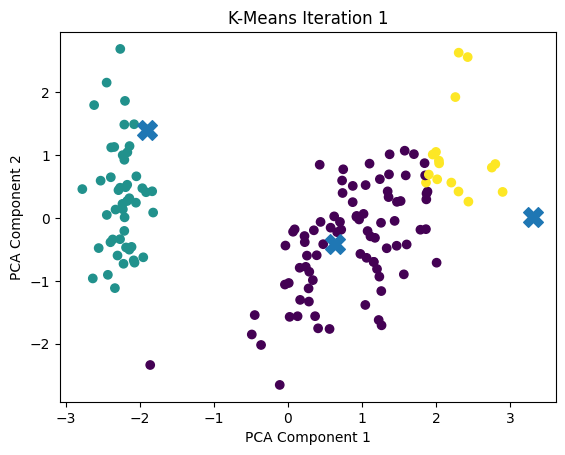

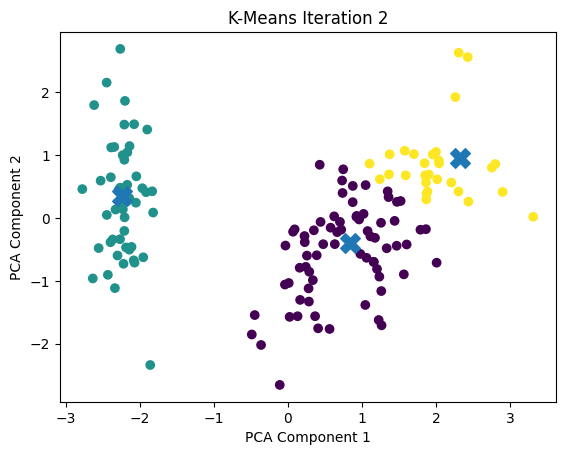

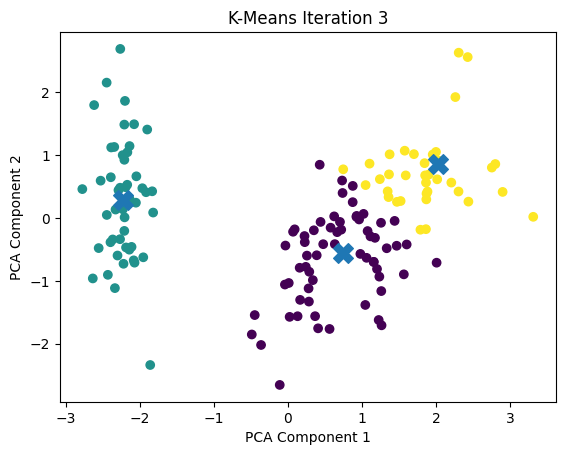

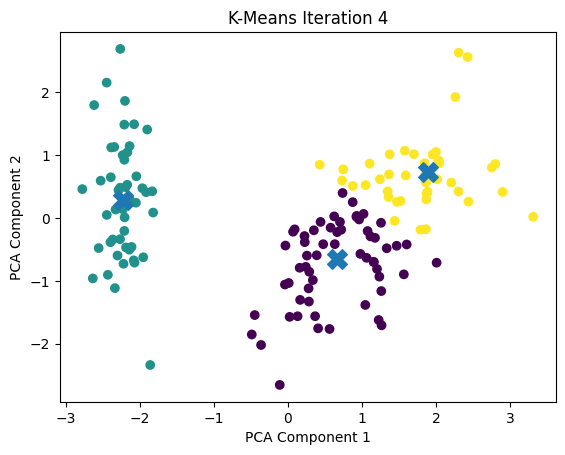

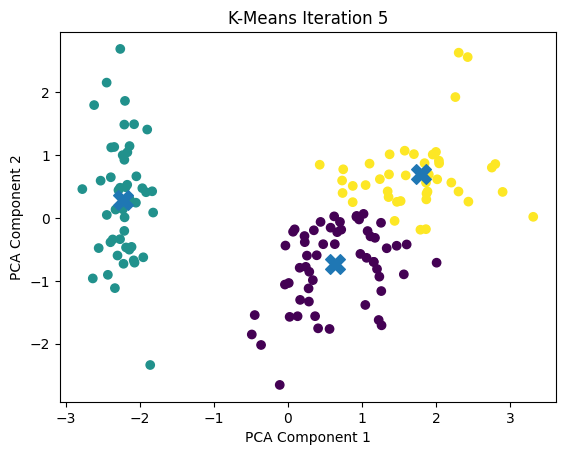

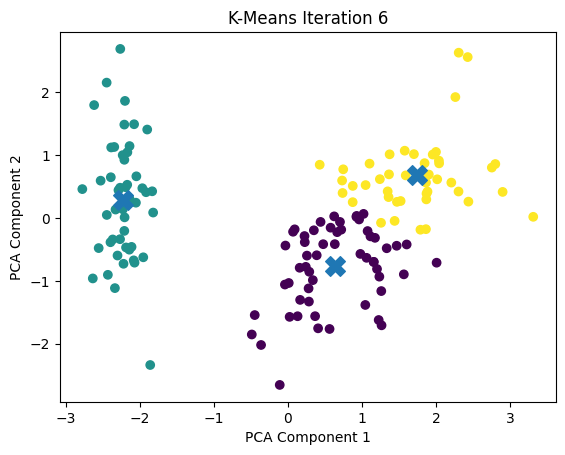

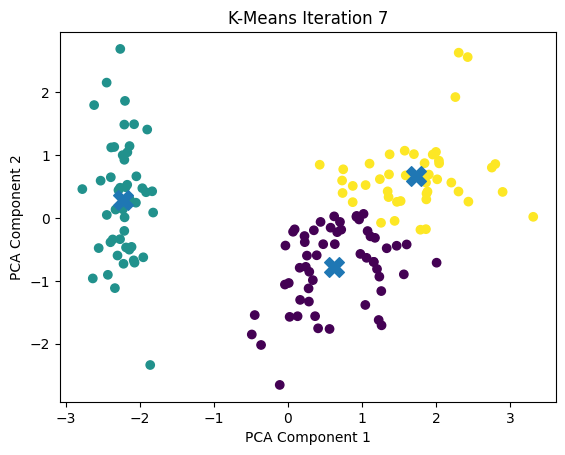

In [7]:
print("\n[INFO] Visualizing algorithm steps...\n")

pca = PCA(n_components=2)
pca.fit(X_scaled)

for i, (X_step, labels_step, centroids_step) in enumerate(kmeans.history):
    plt.figure()

    X_step_pca = pca.transform(X_step)
    centroids_pca = pca.transform(centroids_step)

    plt.scatter(X_step_pca[:, 0], X_step_pca[:, 1], c=labels_step)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200)

    plt.title(f"K-Means Iteration {i+1}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

In [8]:
print("\n[INFO] Evaluating model...\n")

sil_score = silhouette_score(X_scaled, labels)
conf_matrix = confusion_matrix(y_true, labels)

print("Silhouette Score:", sil_score)
print("\nConfusion Matrix:\n", conf_matrix)


[INFO] Evaluating model...

Silhouette Score: 0.4630420362927048

Confusion Matrix:
 [[ 0 50  0]
 [39  0 11]
 [17  0 33]]



[INFO] Computing Elbow Method...


[INFO] Iteration 1

[INFO] Iteration 2
[INFO] Convergence reached.

[INFO] Training completed.

[INFO] Iteration 1

[INFO] Iteration 2

[INFO] Iteration 3
[INFO] Convergence reached.

[INFO] Training completed.

[INFO] Iteration 1

[INFO] Iteration 2

[INFO] Iteration 3

[INFO] Iteration 4

[INFO] Iteration 5

[INFO] Iteration 6

[INFO] Iteration 7
[INFO] Convergence reached.

[INFO] Training completed.

[INFO] Iteration 1

[INFO] Iteration 2

[INFO] Iteration 3

[INFO] Iteration 4

[INFO] Iteration 5

[INFO] Iteration 6

[INFO] Iteration 7

[INFO] Iteration 8

[INFO] Iteration 9

[INFO] Iteration 10
[INFO] Convergence reached.

[INFO] Training completed.

[INFO] Iteration 1

[INFO] Iteration 2

[INFO] Iteration 3

[INFO] Iteration 4

[INFO] Iteration 5

[INFO] Iteration 6

[INFO] Iteration 7
[INFO] Convergence reached.

[INFO] Training completed.

[INFO] Iteration 1

[INFO] Iteration 2

[INFO] Iteration 3

[INFO] Iteration 4

[INFO] Iteration 5

[IN

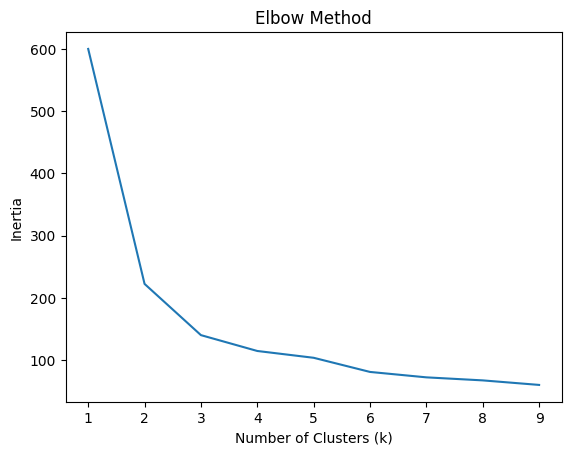

In [9]:
print("\n[INFO] Computing Elbow Method...\n")

inertias = []
k_range = range(1, 10)

for k in k_range:
    model = KMeansCustom(k=k, max_iters=10)
    model.fit(X_scaled)
    
    inertia = 0
    for i in range(k):
        cluster_points = X_scaled[model.labels_ == i]
        centroid = model.centroids[i]
        inertia += np.sum((cluster_points - centroid) ** 2)

    inertias.append(inertia)

plt.figure()
plt.plot(k_range, inertias)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [10]:
print("\n==============================")
print("      MODEL EVALUATION")
print("==============================\n")

# Internal
inertia = 0
for i in range(kmeans.k):
    cluster_points = X_scaled[labels == i]
    centroid = kmeans.centroids[i]
    inertia += np.sum((cluster_points - centroid) ** 2)

sil_score = silhouette_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)

print("Internal Metrics:")
print("Inertia:", inertia)
print("Silhouette:", sil_score)
print("Davies-Bouldin:", db_score)
print("Calinski-Harabasz:", ch_score)

# External
ari = adjusted_rand_score(y_true, labels)
nmi = normalized_mutual_info_score(y_true, labels)
homogeneity = homogeneity_score(y_true, labels)
completeness = completeness_score(y_true, labels)
v_measure = v_measure_score(y_true, labels)

conf_matrix = confusion_matrix(y_true, labels)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / np.sum(conf_matrix)

print("\nExternal Metrics:")
print("ARI:", ari)
print("NMI:", nmi)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V-Measure:", v_measure)
print("Accuracy:", accuracy)


      MODEL EVALUATION

Internal Metrics:
Inertia: 140.0327527742865
Silhouette: 0.4630420362927048
Davies-Bouldin: 0.8324162130910141
Calinski-Harabasz: 241.42632349435513

External Metrics:
ARI: 0.5923326221845838
NMI: 0.6426583176523605
Homogeneity: 0.6412509939057986
Completeness: 0.6440718321615102
V-Measure: 0.6426583176523606
Accuracy: 0.8133333333333334


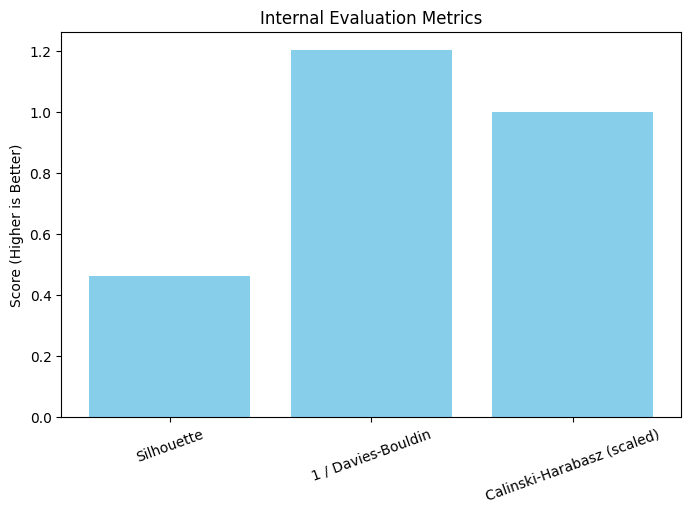

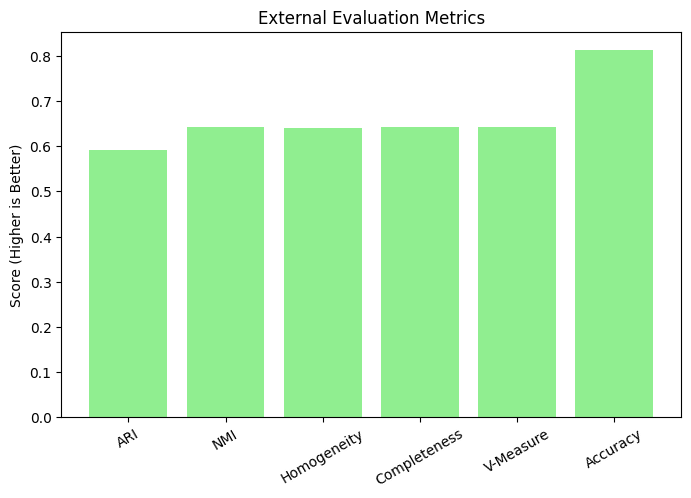

In [11]:
# ---------- INTERNAL METRICS ----------
internal_names = [
    "Silhouette",
    "1 / Davies-Bouldin",
    "Calinski-Harabasz (scaled)"
]

db_inverse = 1 / db_score
ch_scaled = ch_score / max(ch_score, 1)  # برای اطمینان

internal_values = [
    sil_score,
    db_inverse,
    ch_scaled
]

plt.figure(figsize=(8,5))
plt.bar(internal_names, internal_values, color='skyblue')
plt.title("Internal Evaluation Metrics")
plt.ylabel("Score (Higher is Better)")
plt.xticks(rotation=20)
plt.show()


# ---------- EXTERNAL METRICS ----------
external_names = [
    "ARI",
    "NMI",
    "Homogeneity",
    "Completeness",
    "V-Measure",
    "Accuracy"
]

external_values = [
    ari,
    nmi,
    homogeneity,
    completeness,
    v_measure,
    accuracy
]

plt.figure(figsize=(8,5))
plt.bar(external_names, external_values, color='lightgreen')
plt.title("External Evaluation Metrics")
plt.ylabel("Score (Higher is Better)")
plt.xticks(rotation=30)
plt.show()


[INFO] Generating Radar Chart for overall performance...



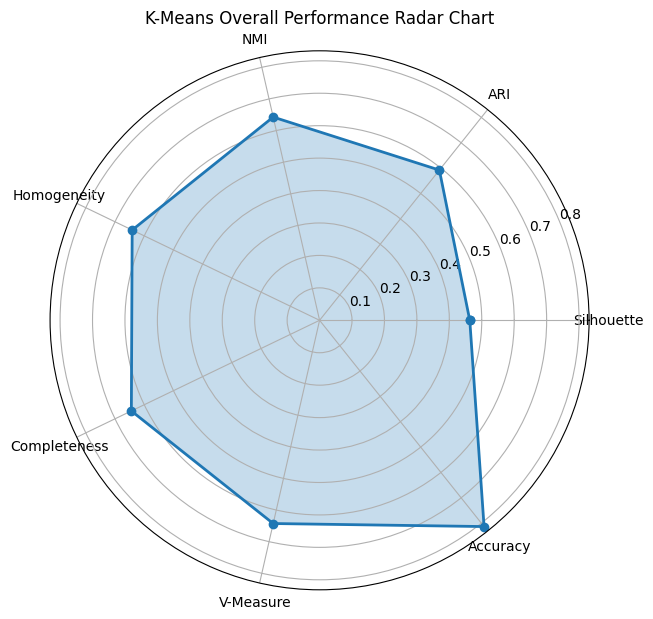

In [12]:
print("\n[INFO] Generating Radar Chart for overall performance...\n")

radar_metrics = {
    "Silhouette": sil_score,
    "ARI": ari,
    "NMI": nmi,
    "Homogeneity": homogeneity,
    "Completeness": completeness,
    "V-Measure": v_measure,
    "Accuracy": accuracy
}

labels = list(radar_metrics.keys())
values = list(radar_metrics.values())

# اتصال اول و آخر برای بسته شدن شکل
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("K-Means Overall Performance Radar Chart", pad=20)

plt.show()

In [13]:
print("\n[INFO] Evaluating different K values...\n")

k_values = range(2, 10)

sil_scores = []
db_scores = []
ch_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = model.fit_predict(X_scaled)
    
    sil_scores.append(silhouette_score(X_scaled, labels_k))
    db_scores.append(davies_bouldin_score(X_scaled, labels_k))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels_k))


[INFO] Evaluating different K values...

